# B.O. experience

configuration of this experiment :

In [30]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

run_id = "20251031_151124"

✅ Summary loaded (45 rows) from ../results/run_20251031_151124/summary.csv


,alpha,rho,lam,MSE_mean,MSE_std,label_err_mean,label_err_std,label_err_mean_noise,label_err_std_noise,train_data_mean,train_reg_mean,train_total_mean
0,0.100000,0.1,0.0,0.000004,7.160918e-07,2.522750e-07,5.202998e-12,2.522750e-07,5.202998e-12,7.174148e-07,0.0,7.174148e-07
1,0.100000,0.5,0.0,1.128698,4.580753e-02,6.338107e-02,2.948980e-07,6.338107e-02,2.948980e-07,2.211707e-05,0.0,2.211707e-05
2,0.100000,1.0,0.0,1.114812,2.508725e-02,5.747649e-02,1.033352e-07,5.747649e-02,1.033352e-07,1.423314e-05,0.0,1.423314e-05
3,0.121429,0.1,0.0,0.000001,3.456946e-07,1.037598e-07,2.410581e-12,1.037598e-07,2.410581e-12,6.687900e-07,0.0,6.687900e-07
4,0.121429,0.5,0.0,0.841250,3.465640e-02,4.986711e-02,1.467465e-07,4.986711e-02,1.467465e-07,1.520017e-05,0.0,1.520017e-05


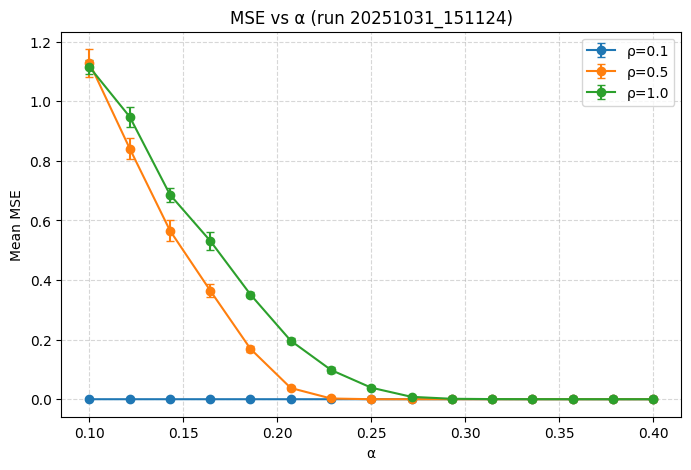

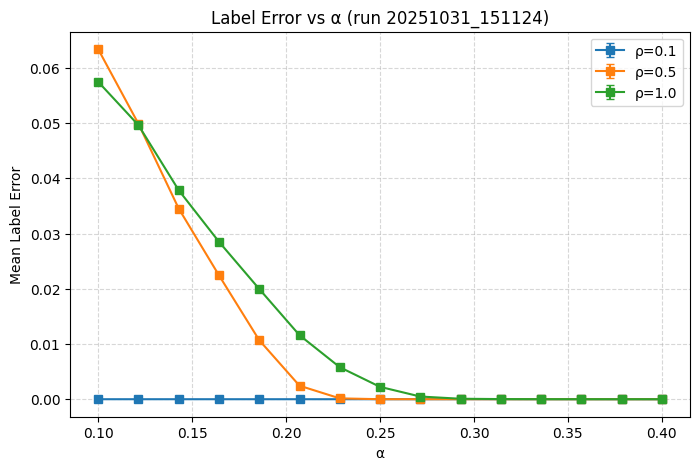

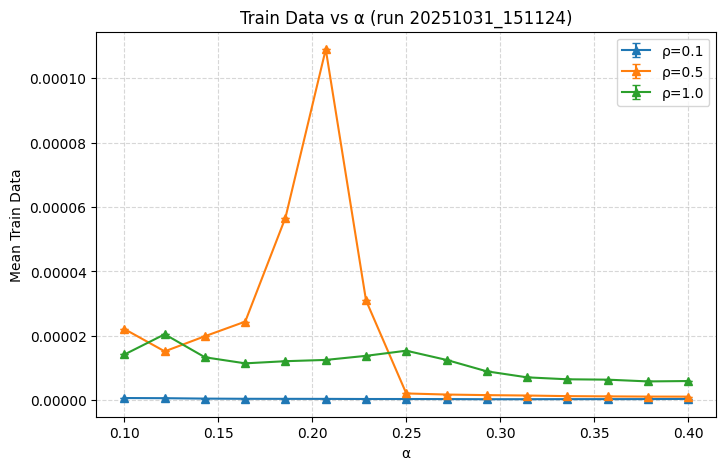

In [31]:
# --- Path to your local folder ---
base_path = f"../results/run_{run_id}/summary.csv"

# --- Read the CSV file ---
df = pd.read_csv(base_path)
print(f"✅ Summary loaded ({len(df)} rows) from {base_path}")

# --- Quick preview ---
display(df.head())

# --- Plot MSE vs alpha with error bars ---
plt.figure(figsize=(8, 5))
for rho in sorted(df["rho"].unique()):
    subset = df[df["rho"] == rho].sort_values("alpha")  # Sort by alpha
    plt.errorbar(subset["alpha"], subset["MSE_mean"], yerr=subset.get("MSE_std", 0), 
                 marker='o', capsize=3, label=f"ρ={rho}")
plt.xlabel("α")
plt.ylabel("Mean MSE")
plt.title(f"MSE vs α (run {run_id})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- Plot Label Error vs alpha with error bars ---
plt.figure(figsize=(8, 5))
for rho in sorted(df["rho"].unique()):
    subset = df[df["rho"] == rho].sort_values("alpha")  # Sort by alpha
    plt.errorbar(subset["alpha"], subset["label_err_mean"], yerr=subset.get("label_err_std", 0), 
                 marker='s', capsize=3, label=f"ρ={rho}")
plt.xlabel("α")
plt.ylabel("Mean Label Error")
plt.title(f"Label Error vs α (run {run_id})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- Plot Train Data vs alpha with error bars ---
plt.figure(figsize=(8, 5))
for rho in sorted(df["rho"].unique()):
    subset = df[df["rho"] == rho].sort_values("alpha")  # Sort by alpha
    plt.errorbar(subset["alpha"], subset["train_data_mean"], yerr=subset.get("train_data_std", 0),
                 marker='^', capsize=3, label=f"ρ={rho}")
plt.xlabel("α")
plt.ylabel("Mean Train Data")
plt.title(f"Train Data vs α (run {run_id})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Found 15 W_runs files.

Processing ../results/run_20251031_151124/W_runs_0.pkl, containing 3 rho indices...


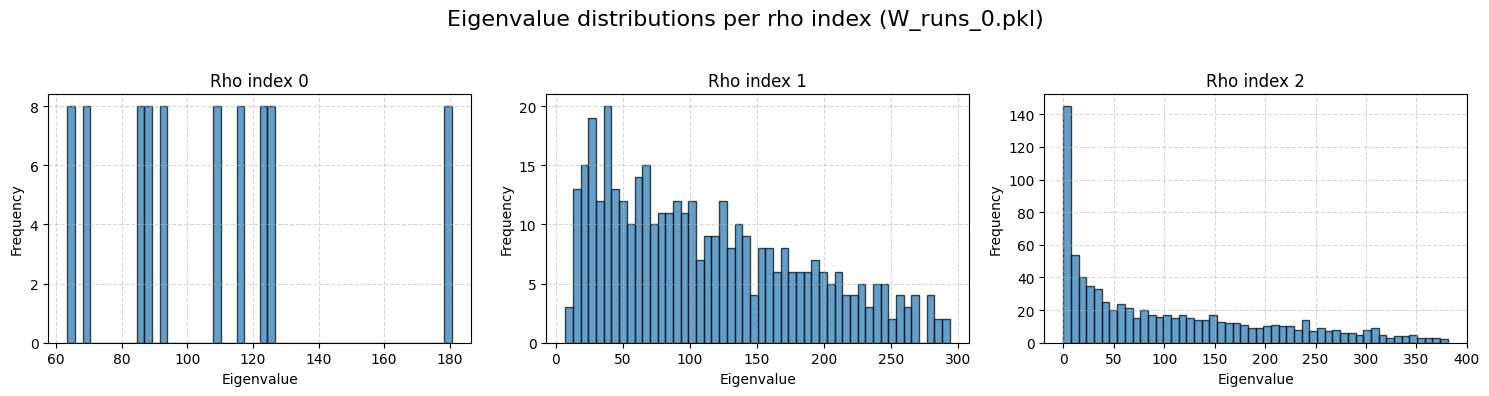


Processing ../results/run_20251031_151124/W_runs_1.pkl, containing 3 rho indices...


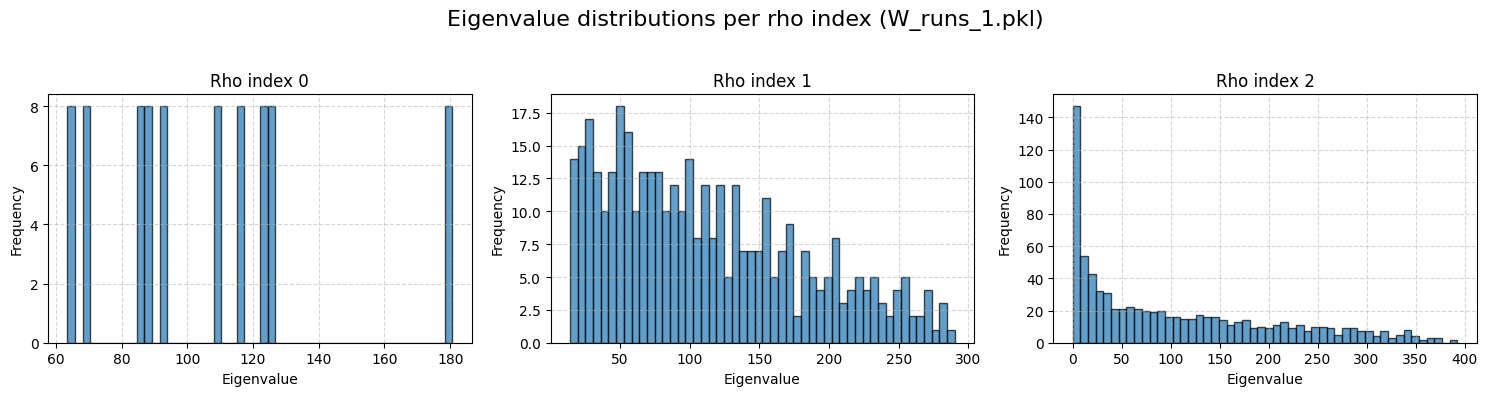


Processing ../results/run_20251031_151124/W_runs_10.pkl, containing 3 rho indices...


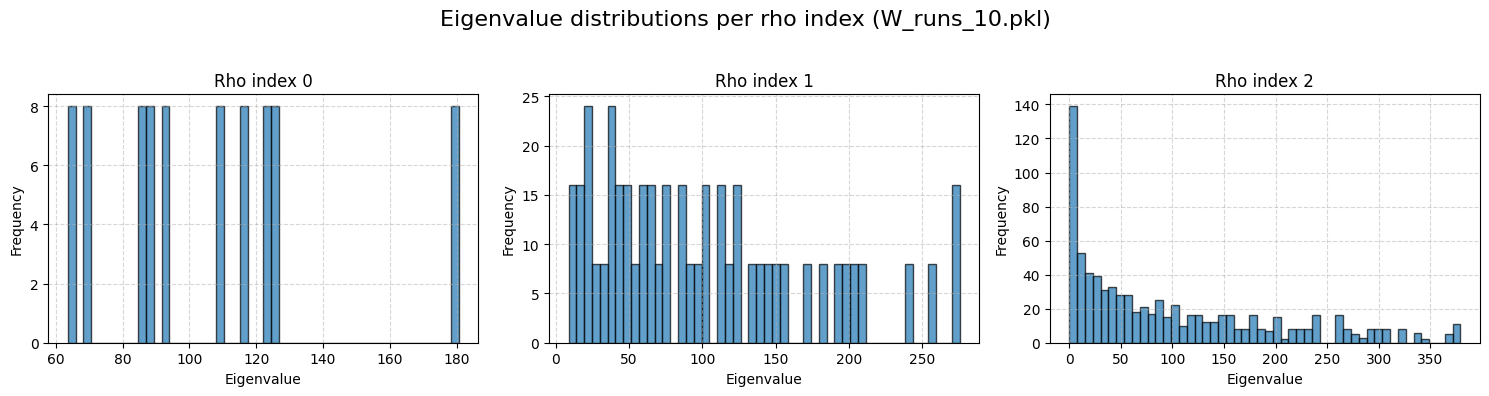


Processing ../results/run_20251031_151124/W_runs_11.pkl, containing 3 rho indices...


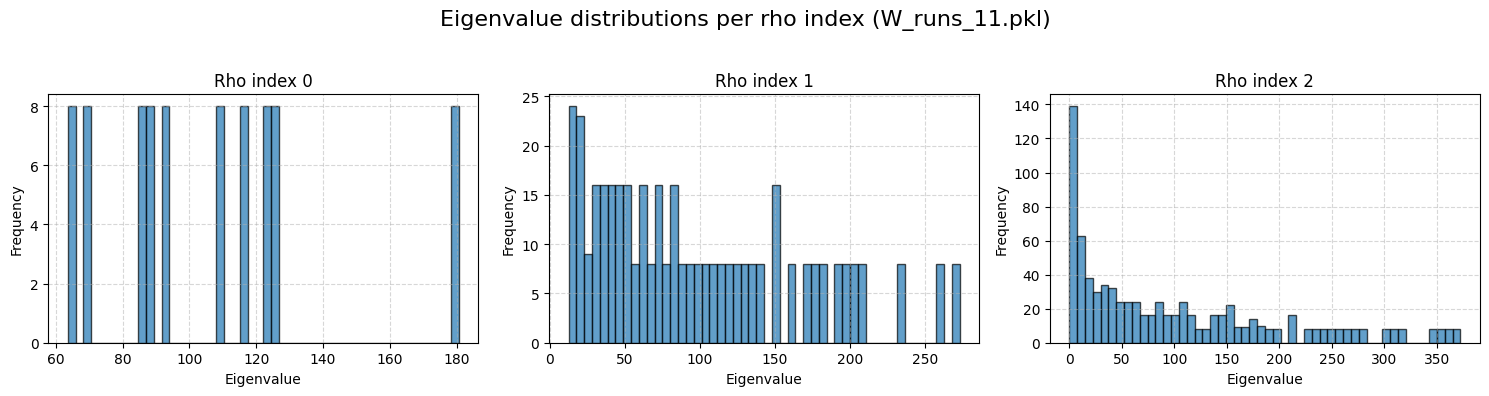


Processing ../results/run_20251031_151124/W_runs_12.pkl, containing 3 rho indices...


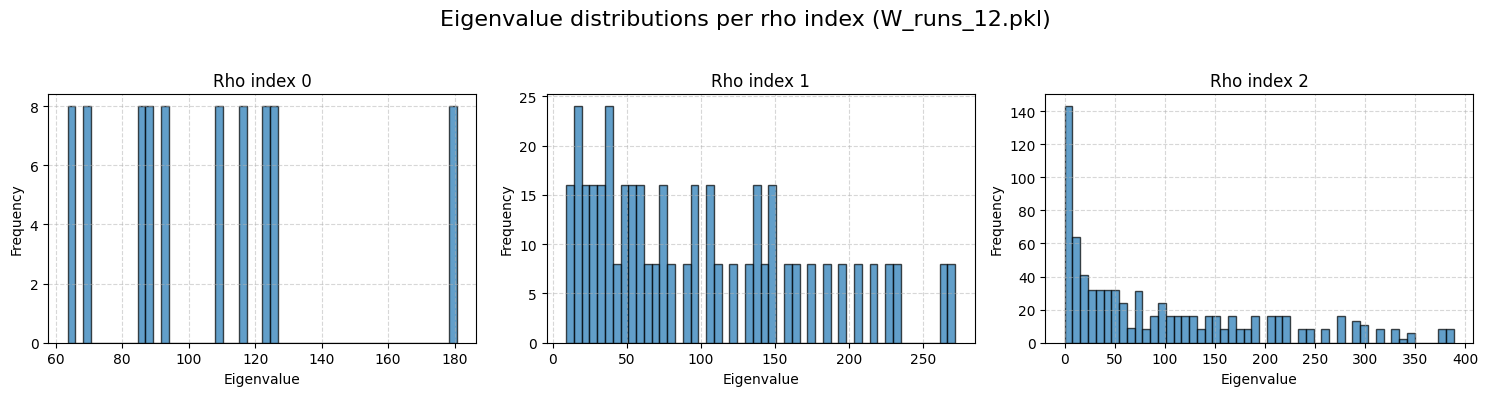


Processing ../results/run_20251031_151124/W_runs_13.pkl, containing 3 rho indices...


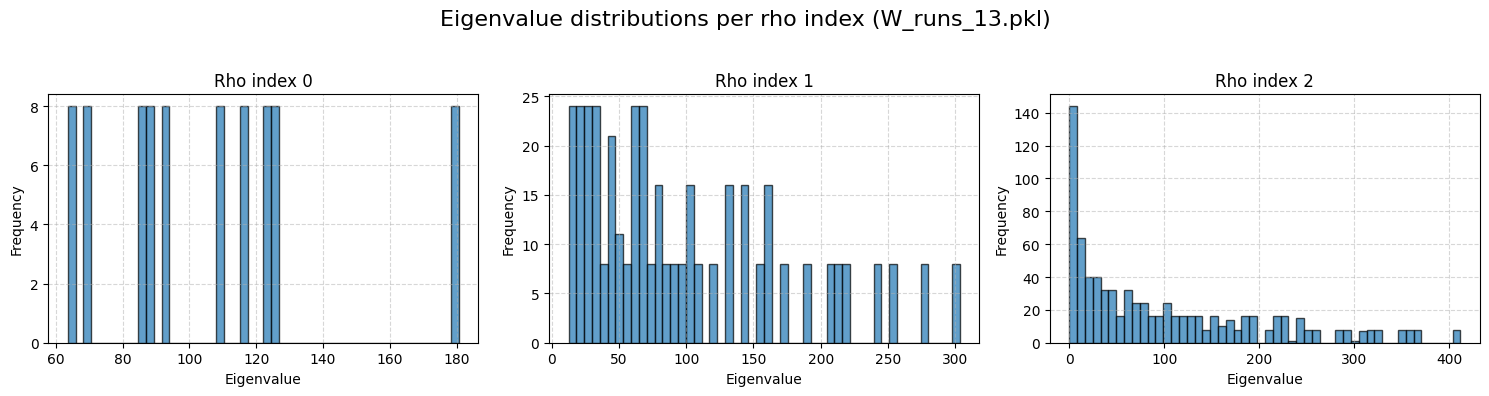


Processing ../results/run_20251031_151124/W_runs_14.pkl, containing 3 rho indices...


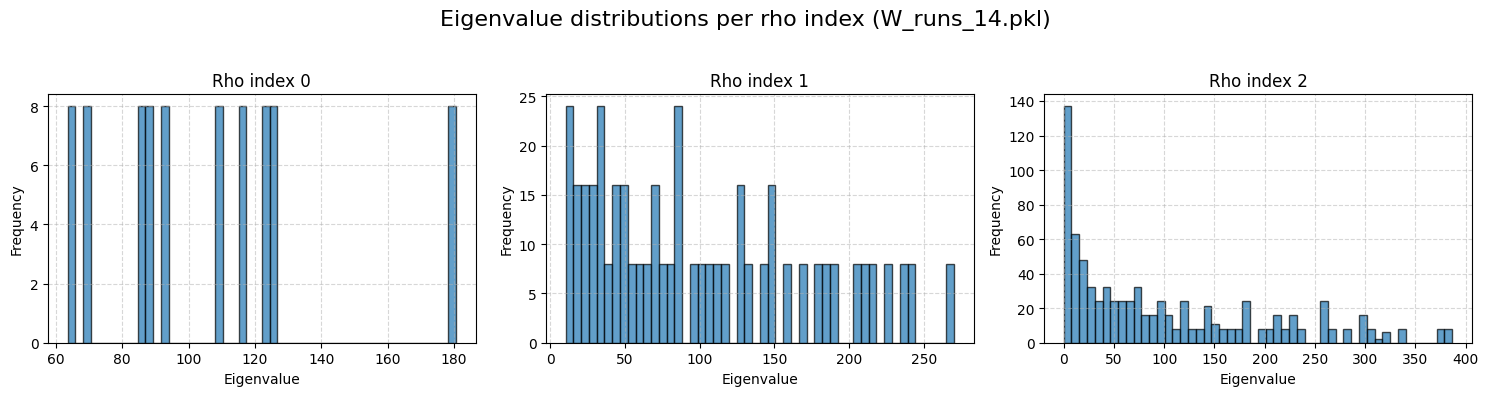


Processing ../results/run_20251031_151124/W_runs_2.pkl, containing 3 rho indices...


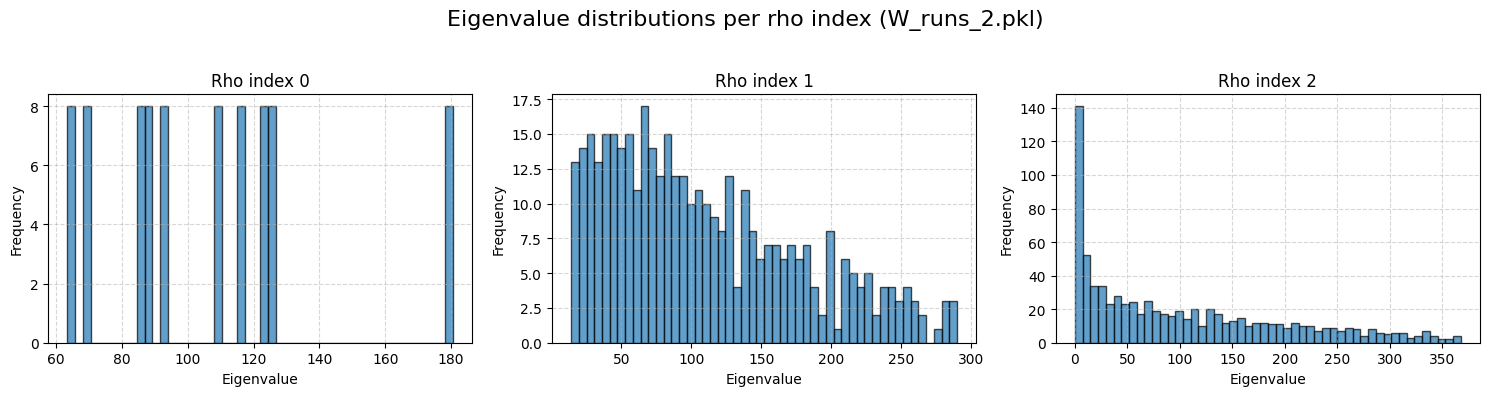


Processing ../results/run_20251031_151124/W_runs_3.pkl, containing 3 rho indices...


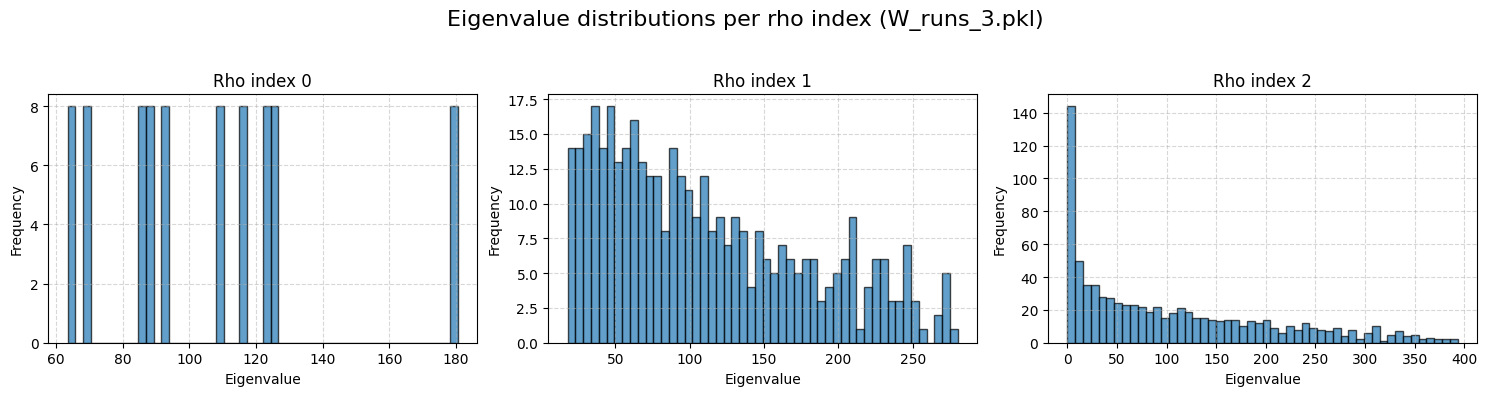


Processing ../results/run_20251031_151124/W_runs_4.pkl, containing 3 rho indices...


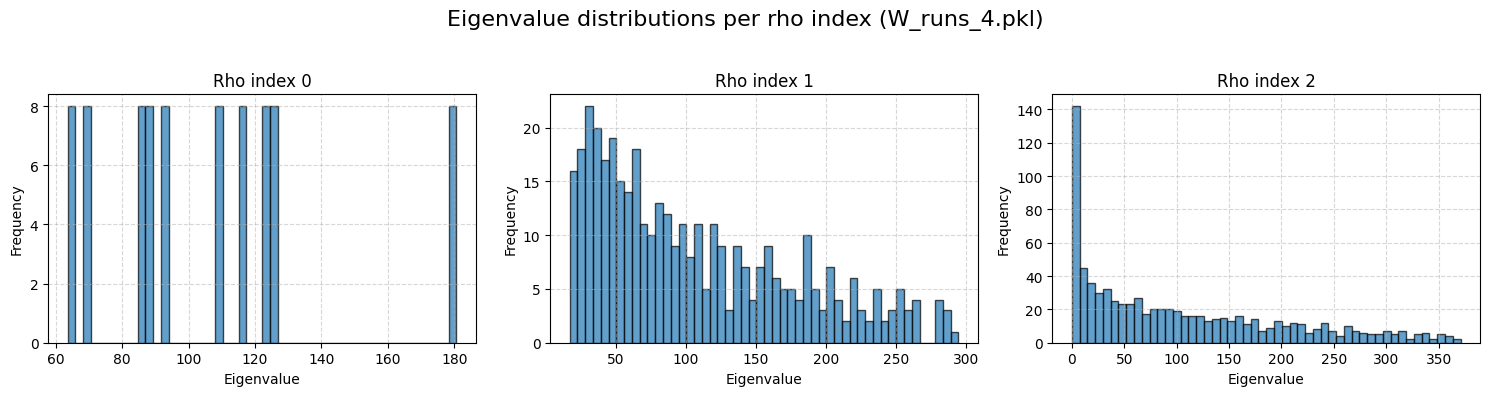


Processing ../results/run_20251031_151124/W_runs_5.pkl, containing 3 rho indices...


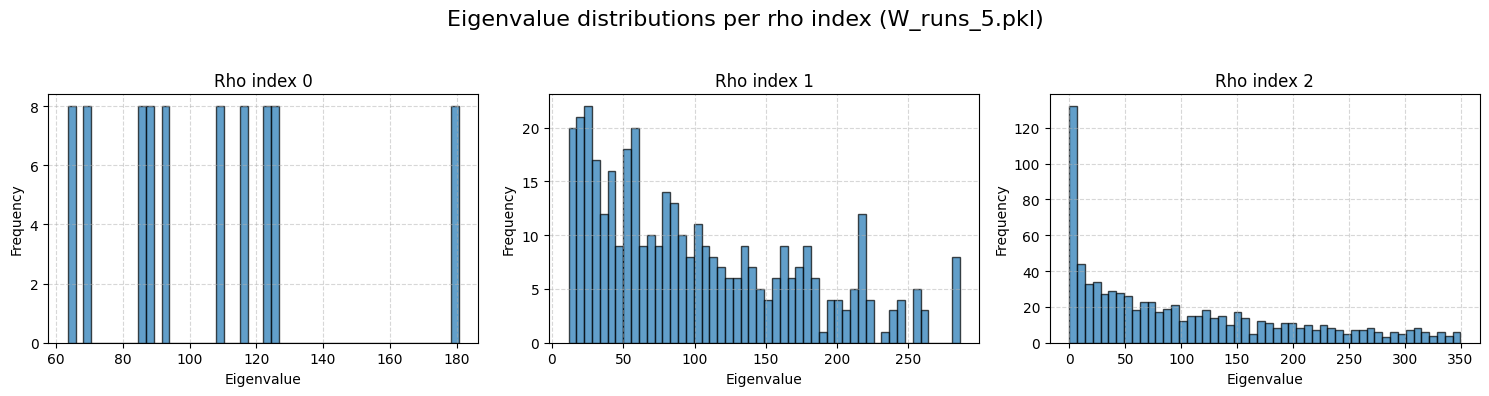


Processing ../results/run_20251031_151124/W_runs_6.pkl, containing 3 rho indices...


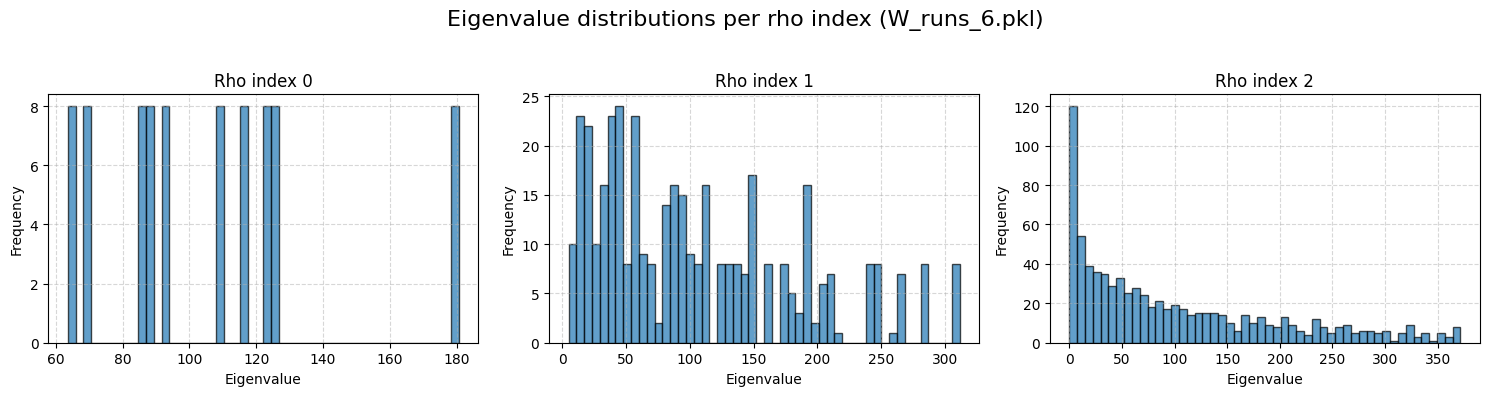


Processing ../results/run_20251031_151124/W_runs_7.pkl, containing 3 rho indices...


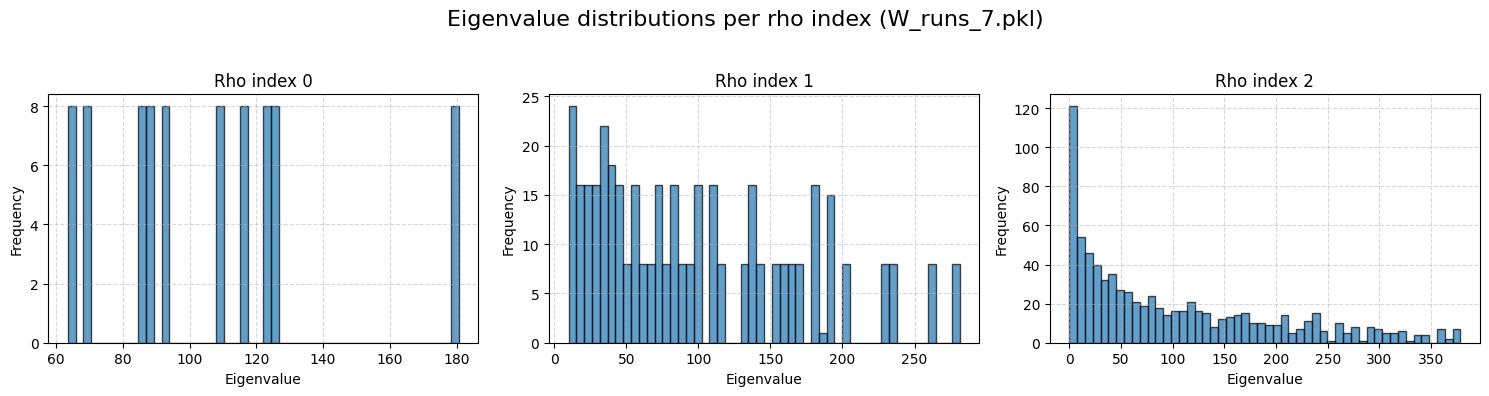


Processing ../results/run_20251031_151124/W_runs_8.pkl, containing 3 rho indices...


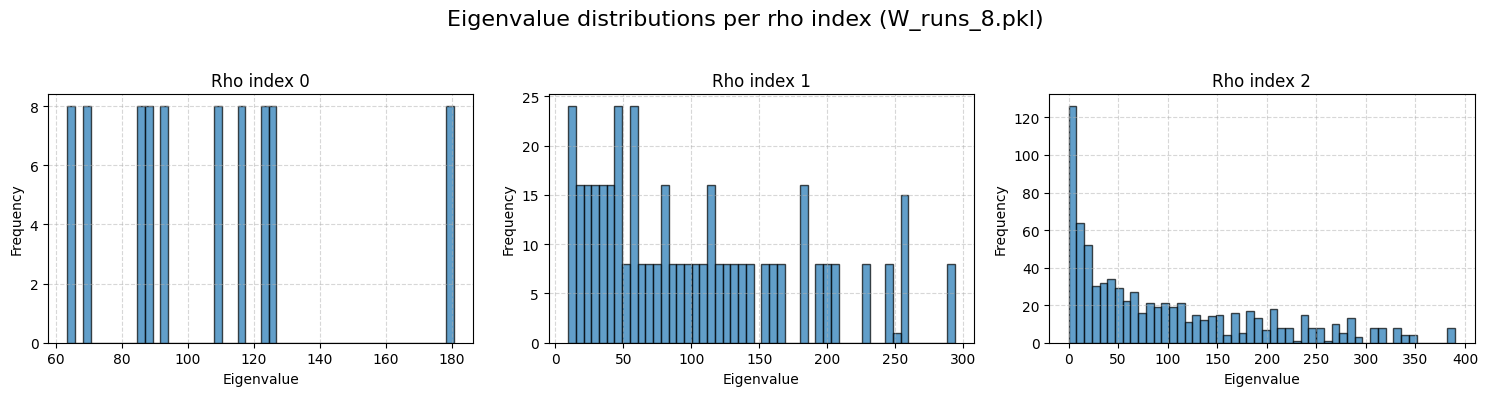


Processing ../results/run_20251031_151124/W_runs_9.pkl, containing 3 rho indices...


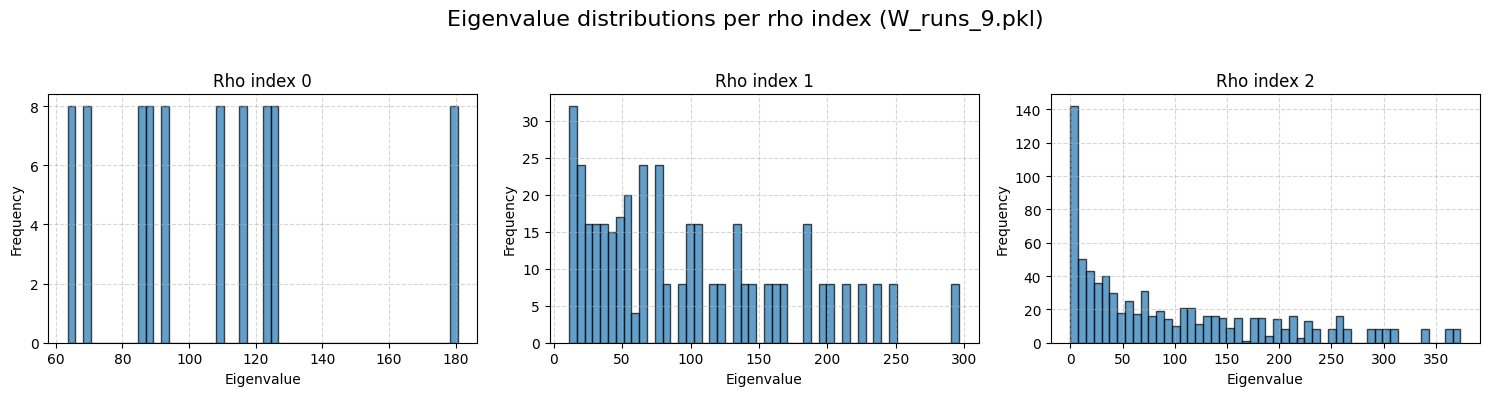

In [32]:
# --- Path to your results directory ---
run_dir = f"../results/run_{run_id}"  # replace with your run_id
pkl_files = sorted(glob.glob(os.path.join(run_dir, "W_runs_*.pkl")))

print(f"Found {len(pkl_files)} W_runs files.")

# --- Loop over each W_runs pickle file ---
for pkl_file in pkl_files:
    with open(pkl_file, "rb") as f:
        W_runs_all = pickle.load(f)  # List of W lists per rho index (i)

    print(f"\nProcessing {pkl_file}, containing {len(W_runs_all)} rho indices...")

    num_rho = len(W_runs_all)
    fig, axes = plt.subplots(1, num_rho, figsize=(5*num_rho, 4), squeeze=False)

    for i, W_list in enumerate(W_runs_all):
        all_eigvals_i = []
        for W in W_list:
            eigvals = np.linalg.eigvalsh(W @ W.T)
            all_eigvals_i.extend(eigvals)

        all_eigvals_i = np.array(all_eigvals_i)

        ax = axes[0, i]
        ax.hist(all_eigvals_i, bins=50, alpha=0.7, edgecolor='black')
        ax.set_xlabel("Eigenvalue")
        ax.set_ylabel("Frequency")
        ax.set_title(f"Rho index {i}")
        ax.grid(True, linestyle="--", alpha=0.5)

    fig.suptitle(f"Eigenvalue distributions per rho index ({os.path.basename(pkl_file)})", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()